In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

from random import shuffle

In [2]:
def label_img(img):
    word_label = img.split('_')[0]
    if word_label == '0' : return 0
    elif word_label == '1' : return 1
    elif word_label == '6' : return 2
    elif word_label == '12' : return 3
    elif word_label == '9' : return 4

In [4]:
def load_data(dir_name:str, size:int, grayscale:bool):
    data = []
    labels = []
    paths = []
    for img in os.listdir(dir_name):
        label = label_img(img)
        path = os.path.join(dir_name,img)
        
        if grayscale:
            img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(2*size,size))
        else:
            img = cv2.resize(cv2.imread(path),(2*size,size))
        data.append(np.array(img[0:size,0:size]))
        labels.append(label)
        paths.append(path)
        
    data = np.array(data)
    labels = np.array(labels)
    paths = np.array(paths)
    
    num_elements = len(labels)
    permutation_index = np.random.permutation(num_elements)
    
    data = data[permutation_index]
    labels = labels[permutation_index]
    paths = paths[permutation_index]
    
    return data, labels, paths

# Base Problem - Alexander and Ptolemy I

In [56]:
train_dir = r'0_1_train'
test_dir = r'0_1_test'
size = 70
is_gray = True
x_train, y_train, train_paths = load_data(train_dir, size, is_gray)
x_test, y_test, test_paths = load_data(test_dir, size, is_gray)

Text(0.5, 1.0, 'Train')

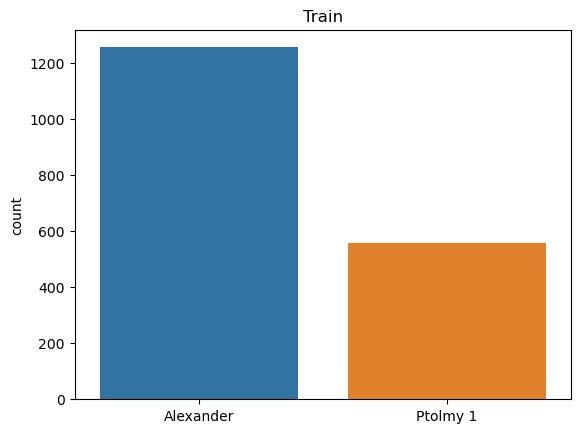

In [60]:
classes = ['Alexander', 'Ptolmy 1']
ax = sns.countplot(x = y_train)
ax.set_xticklabels(classes)
ax.set_title("Train")

Text(0.5, 1.0, 'Test')

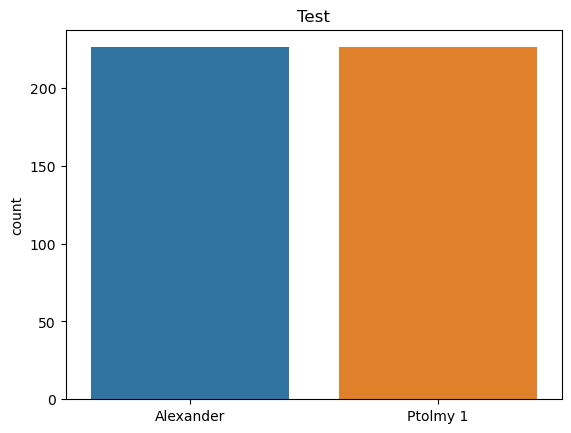

In [61]:
ax = sns.countplot(x = y_test)
ax.set_xticklabels(classes)
ax.set_title("Test")

In [12]:
model = models.Sequential(name = "Base_Problem_Model")
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(70, 70, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(42, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(52, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(62, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "Base_Problem_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 68, 68, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 42)        12138     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 42)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 52)        19708     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 52)  

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)

weights = {0: 1.,
           1: len(y_train[y_train == 0])/len(y_train[y_train == 1])}

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

cp_path = "models_checkpoints/"+model.name+"/"+model.name
cp = ModelCheckpoint(monitor='val_accuracy', mode='max', save_weights_only=True, filepath=cp_path)

history = model.fit(x_train, y_train, epochs=18, batch_size=18,
                    validation_data = (x_test,y_test),callbacks=[es,cp],class_weight=weights)

Epoch 1/18
101/101 [==============================] - 3s 22ms/step - loss: 1.1357 - accuracy: 0.7787 - val_loss: 0.1291 - val_accuracy: 0.9646
Epoch 2/18
101/101 [==============================] - 2s 16ms/step - loss: 0.2063 - accuracy: 0.9448 - val_loss: 0.0342 - val_accuracy: 0.9956
Epoch 3/18
101/101 [==============================] - 2s 16ms/step - loss: 0.1300 - accuracy: 0.9652 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 4/18
101/101 [==============================] - 2s 17ms/step - loss: 0.0930 - accuracy: 0.9796 - val_loss: 0.0161 - val_accuracy: 0.9956
Epoch 5/18
101/101 [==============================] - 2s 16ms/step - loss: 0.0917 - accuracy: 0.9796 - val_loss: 0.0093 - val_accuracy: 0.9978
Epoch 6/18
101/101 [==============================] - 2s 17ms/step - loss: 0.0669 - accuracy: 0.9851 - val_loss: 0.0225 - val_accuracy: 0.9956
Epoch 7/18
101/101 [==============================] - 2s 16ms/step - loss: 0.0392 - accuracy: 0.9928 - val_loss: 0.0236 - val_accuracy: 0.9934

15/15 - 0s - loss: 0.0157 - accuracy: 1.0000 - 118ms/epoch - 8ms/step
15/15 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00       226

    accuracy                           1.00       452
   macro avg       1.00      1.00      1.00       452
weighted avg       1.00      1.00      1.00       452



Text(50.722222222222214, 0.5, 'Actual')

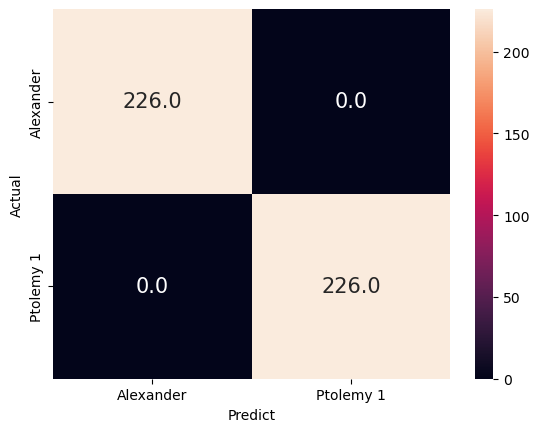

In [18]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
y_pred = np.argmax(model.predict(x_test),axis=-1)
print (classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
y_labels =['Alexander', 'Ptolemy 1']
x_labels =['Alexander', 'Ptolemy 1']
sns.heatmap(cm,annot=True, xticklabels = x_labels, yticklabels = y_labels, annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

# Main Problem - Alexander, Ptolemy I, Ptolemy VI, Ptolemy IX, Ptolemy XII

## Basic model

In [62]:
train_dir = r'train'
test_dir = r'test'
size = 150
is_gray = False
x_train, y_train, train_paths = load_data(train_dir, size, is_gray)
x_test, y_test, test_paths = load_data(test_dir, size, is_gray)

Text(0.5, 1.0, 'Train')

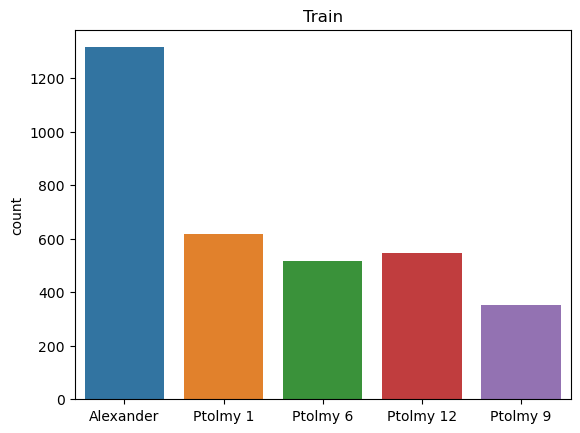

In [63]:
classes = ['Alexander', 'Ptolmy 1', 'Ptolmy 6','Ptolmy 12','Ptolmy 9']
ax = sns.countplot(x = y_train)
ax.set_xticklabels(classes)
ax.set_title("Train")

Text(0.5, 1.0, 'Test')

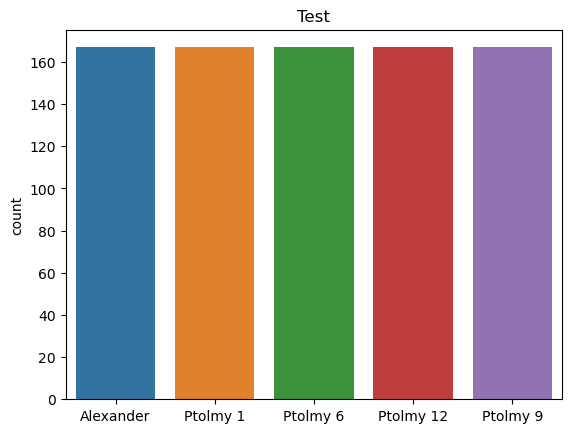

In [64]:
ax = sns.countplot(x = y_test)
ax.set_xticklabels(classes)
ax.set_title("Test")

In [34]:
model = models.Sequential(name = "Main_Problem_Model")
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(42, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(52, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(62, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "Main_Problem_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 42)        12138     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 36, 36, 42)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 52)        19708     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 17, 17, 52)

In [35]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)

weights = {0: 1.,
           1: len(y_train[y_train == 0])/len(y_train[y_train == 1]),
           2: len(y_train[y_train == 0])/len(y_train[y_train == 2]),
           3: len(y_train[y_train == 0])/len(y_train[y_train == 3]),
           4: len(y_train[y_train == 0])/len(y_train[y_train == 4])}

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

cp_path = "models_checkpoints/"+model.name+"/"+model.name
cp = ModelCheckpoint(monitor='val_accuracy', mode='max', save_weights_only=True, filepath=cp_path)

history = model.fit(x_train, y_train, epochs=33, batch_size=33,
                    validation_data = (x_test,y_test),callbacks=[es,cp],class_weight=weights)

Epoch 1/33
102/102 [==============================] - 15s 138ms/step - loss: 6.6698 - accuracy: 0.2590 - val_loss: 1.4116 - val_accuracy: 0.3533
Epoch 2/33
102/102 [==============================] - 14s 139ms/step - loss: 2.3525 - accuracy: 0.5886 - val_loss: 1.1012 - val_accuracy: 0.5497
Epoch 3/33
102/102 [==============================] - 14s 140ms/step - loss: 1.7627 - accuracy: 0.7192 - val_loss: 0.7556 - val_accuracy: 0.6886
Epoch 4/33
102/102 [==============================] - 15s 143ms/step - loss: 1.3894 - accuracy: 0.7894 - val_loss: 0.6720 - val_accuracy: 0.7317
Epoch 5/33
102/102 [==============================] - 14s 137ms/step - loss: 1.2026 - accuracy: 0.8306 - val_loss: 0.6724 - val_accuracy: 0.7341
Epoch 6/33
102/102 [==============================] - 14s 142ms/step - loss: 1.1879 - accuracy: 0.8309 - val_loss: 0.7204 - val_accuracy: 0.7353
Epoch 7/33
102/102 [==============================] - 14s 140ms/step - loss: 0.9944 - accuracy: 0.8569 - val_loss: 0.6445 - val_ac

27/27 - 1s - loss: 0.5383 - accuracy: 0.8084 - 860ms/epoch - 32ms/step
27/27 [==============================] - 1s 34ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       167
           1       0.93      0.92      0.92       167
           2       0.76      0.87      0.82       167
           3       0.70      0.64      0.67       167
           4       0.65      0.63      0.64       167

    accuracy                           0.81       835
   macro avg       0.81      0.81      0.81       835
weighted avg       0.81      0.81      0.81       835



Text(50.722222222222214, 0.5, 'Actual')

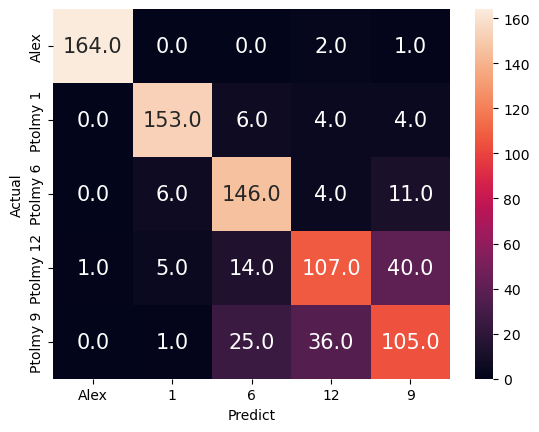

In [36]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
y_pred = np.argmax(model.predict(x_test),axis=-1)
print (classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
y_labels =['Alex', 'Ptolmy 1', 'Ptolmy 6','Ptolmy 12','Ptolmy 9']
x_labels =['Alex', '1', '6','12','9',]
sns.heatmap(cm,annot=True, xticklabels = x_labels, yticklabels = y_labels, annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

## VGG16 Model

In [42]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
## Preprocessing input do not scale the if you want to use this preprocess!!!!!!!!!
x_train_pre_vgg = preprocess_input(x_train) 
x_test_pre_vgg = preprocess_input(x_test)

base_model = VGG16(weights="imagenet", include_top=False, input_shape=x_train[0].shape)
for layer in base_model.layers:
    layer.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [43]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(64, activation='relu')
dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
],name = "Simple_VGG16")
model.summary()

Model: "Simple_VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 8192)              0         
                                                                 
 dense_24 (Dense)            (None, 64)                524352    
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 5)                 165       
                                                                 
Total params: 15,241,285
Trainable params: 526,597
Non-trainable params: 14,714,688
_________________________________________________________________


In [44]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)

weights = {0: 1.,
           1: len(y_train[y_train == 0])/len(y_train[y_train == 1]),
           2: len(y_train[y_train == 0])/len(y_train[y_train == 2]),
           3: len(y_train[y_train == 0])/len(y_train[y_train == 3]),
           4: len(y_train[y_train == 0])/len(y_train[y_train == 4])}

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

cp_path = "models_checkpoints/"+model.name+"/"+model.name
cp = ModelCheckpoint(monitor='val_accuracy', mode='max', save_weights_only=True, filepath=cp_path)

history = model.fit(x_train_pre_vgg, y_train, epochs=33, batch_size=33,
                    validation_data = (x_test_pre_vgg,y_test),callbacks=[es,cp],class_weight=weights)

Epoch 1/33
102/102 [==============================] - 135s 1s/step - loss: 3.2711 - accuracy: 0.6265 - val_loss: 0.7841 - val_accuracy: 0.6886
Epoch 2/33
102/102 [==============================] - 134s 1s/step - loss: 1.2749 - accuracy: 0.8148 - val_loss: 0.6321 - val_accuracy: 0.7964
Epoch 3/33
102/102 [==============================] - 134s 1s/step - loss: 0.8620 - accuracy: 0.8778 - val_loss: 0.6172 - val_accuracy: 0.8000
Epoch 4/33
102/102 [==============================] - 134s 1s/step - loss: 0.6929 - accuracy: 0.9020 - val_loss: 0.4956 - val_accuracy: 0.8359
Epoch 5/33
102/102 [==============================] - 136s 1s/step - loss: 0.5156 - accuracy: 0.9244 - val_loss: 0.6670 - val_accuracy: 0.8180
Epoch 6/33
102/102 [==============================] - 135s 1s/step - loss: 0.3802 - accuracy: 0.9432 - val_loss: 0.7216 - val_accuracy: 0.8120
Epoch 7/33
102/102 [==============================] - 136s 1s/step - loss: 0.3052 - accuracy: 0.9555 - val_loss: 0.7688 - val_accuracy: 0.8192

27/27 - 27s - loss: 0.4956 - accuracy: 0.8359 - 27s/epoch - 990ms/step
27/27 [==============================] - 28s 1s/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       167
           1       0.91      0.93      0.92       167
           2       0.89      0.80      0.85       167
           3       0.71      0.71      0.71       167
           4       0.69      0.74      0.71       167

    accuracy                           0.84       835
   macro avg       0.84      0.84      0.84       835
weighted avg       0.84      0.84      0.84       835



Text(50.722222222222214, 0.5, 'Actual')

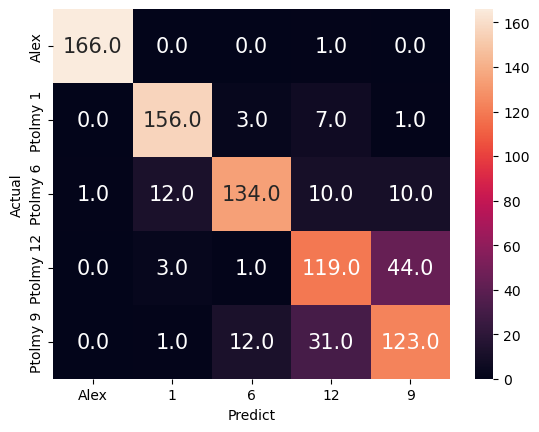

In [45]:
test_loss, test_acc = model.evaluate(x_test_pre_vgg,  y_test, verbose=2)
y_pred = np.argmax(model.predict(x_test_pre_vgg),axis=-1)
print (classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
y_labels =['Alex', 'Ptolmy 1', 'Ptolmy 6','Ptolmy 12','Ptolmy 9']
x_labels =['Alex', '1', '6','12','9',]
sns.heatmap(cm,annot=True, xticklabels = x_labels, yticklabels = y_labels, annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

## ResNet50 Model

In [65]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
## Preprocessing input do not scale the if you want to use this preprocess!!!!!!!!!
x_train_pre_res = preprocess_input(x_train) 
x_test_pre_res = preprocess_input(x_test)

base_model = ResNet50(weights="imagenet", include_top=False, input_shape=x_train[0].shape)
for layer in base_model.layers[:143]:
    layer.trainable = False

for i, layer in enumerate(base_model.layers):
    print(i,layer.name,"-",layer.trainable)

0 input_3 - False
1 conv1_pad - False
2 conv1_conv - False
3 conv1_bn - False
4 conv1_relu - False
5 pool1_pad - False
6 pool1_pool - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_conv - False
11 conv2_block1_2_bn - False
12 conv2_block1_2_relu - False
13 conv2_block1_0_conv - False
14 conv2_block1_3_conv - False
15 conv2_block1_0_bn - False
16 conv2_block1_3_bn - False
17 conv2_block1_add - False
18 conv2_block1_out - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_conv - False
23 conv2_block2_2_bn - False
24 conv2_block2_2_relu - False
25 conv2_block2_3_conv - False
26 conv2_block2_3_bn - False
27 conv2_block2_add - False
28 conv2_block2_out - False
29 conv2_block3_1_conv - False
30 conv2_block3_1_bn - False
31 conv2_block3_1_relu - False
32 conv2_block3_2_conv - False
33 conv2_block3_2_bn - False
34 conv2_block3_2_relu - False
35 conv2_block3_3_conv - 

In [66]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(64, activation='relu')
dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
], name = "ResNet50_with_trainable_layers_split_data")
model.summary()

Model: "ResNet50_with_trainable_layers_split_data"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_9 (Flatten)         (None, 51200)             0         
                                                                 
 dense_27 (Dense)            (None, 64)                3276864   
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 5)                 165       
                                                                 
Total params: 26,866,821
Trainable params: 18,255,109
Non-trainable params: 8,611,712
_________________________________________________________________


In [67]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)

model.load_weights(r'models_checkpoints\ResNet50_with_trainable_layers_split_data\ResNet50_with_trainable_layers_split_data')
# weights = {0: 1.,
#            1: len(y_train[y_train == 0])/len(y_train[y_train == 1]),
#            2: len(y_train[y_train == 0])/len(y_train[y_train == 2]),
#            3: len(y_train[y_train == 0])/len(y_train[y_train == 3]),
#            4: len(y_train[y_train == 0])/len(y_train[y_train == 4])}

# es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

# cp_path = "models_checkpoints/"+model.name+"/"+model.name
# cp = ModelCheckpoint(monitor='val_accuracy', mode='max', save_weights_only=True, filepath=cp_path)

# history = model.fit(x_train_pre_res, y_train, epochs=33, batch_size=33,
#                     validation_data = (x_test_pre_res,y_test),callbacks=[es,cp],class_weight=weights)

27/27 - 14s - loss: 0.4916 - accuracy: 0.8958 - 14s/epoch - 504ms/step
27/27 [==============================] - 14s 469ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       167
           1       0.95      0.98      0.97       167
           2       0.91      0.92      0.92       167
           3       0.80      0.79      0.79       167
           4       0.82      0.78      0.80       167

    accuracy                           0.90       835
   macro avg       0.89      0.90      0.90       835
weighted avg       0.89      0.90      0.90       835



Text(50.722222222222214, 0.5, 'Actual')

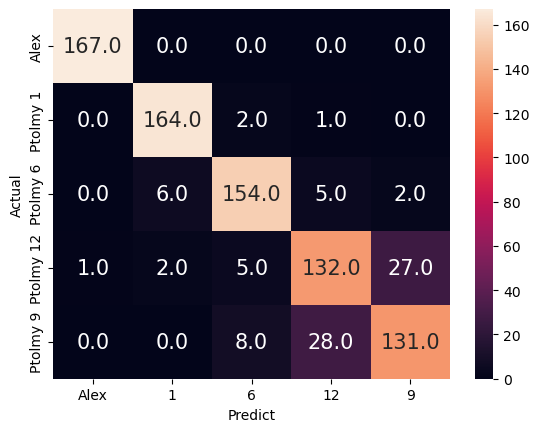

In [68]:
test_loss, test_acc = model.evaluate(x_test_pre_res,  y_test, verbose=2)
y_pred = np.argmax(model.predict(x_test_pre_res),axis=-1)
print (classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
y_labels =['Alex', 'Ptolmy 1', 'Ptolmy 6','Ptolmy 12','Ptolmy 9']
x_labels =['Alex', '1', '6','12','9',]
sns.heatmap(cm,annot=True, xticklabels = x_labels, yticklabels = y_labels, annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")